In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_excel('/content/dataset_cleaning_new.xlsx')

In [ ]:
df.head(20)

,Patient ID,Name,Age,Body,Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose (HbA1c),Outcome
0,1994601,Moulya,20,36.4,91,161,100,24.9,5.8,high risk
1,2001562,Soni,45,36.5,99,99,94,22.1,5.7,high risk
2,2002530,Baishali,29,37.0,84,129,87,19.0,6.4,mid risk
3,2002114,Abhilasha,26,37.5,135,161,101,23.7,4.5,high risk
4,2002058,Aanaya,38,39.2,51,106,91,18.8,4.3,high risk
5,1993812,Navni,21,37.0,85,142,89,22.0,5.6,mid risk
6,2010231,Tarishi,23,37.1,70,141,80,18.8,5.6,mid risk
7,2002173,Vihaarika,38,38.4,141,144,84,24.8,5.8,high risk
8,2011035,Malarvili,42,39.7,144,124,83,24.7,6.3,high risk
9,2002531,Mutharasi,22,37.8,62,144,92,24.3,6.7,high risk


In [ ]:
# Menampilkan informasi data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       5687 non-null   int64  
 1   Name                             5687 non-null   object 
 2   Age                              5687 non-null   int64  
 3   Body                             5687 non-null   float64
 4   Heart rate(bpm)                  5687 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)   5687 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)  5687 non-null   int64  
 7   BMI(kg/m 2)                      5687 non-null   float64
 8   Blood Glucose (HbA1c)            5687 non-null   float64
 9   Outcome                          5687 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 444.4+ KB
None


In [ ]:
# Statistik deskriptif untuk data numerik
print(df.describe())

         Patient ID          Age         Body  Heart rate(bpm)  \
count  5.687000e+03  5687.000000  5687.000000      5687.000000   
mean   2.003360e+06    26.506946    37.027730        86.052576   
std    6.607917e+03     6.476309     0.884708        22.519860   
min    1.993366e+06    15.000000     4.200000        45.000000   
25%    1.994894e+06    22.000000    37.000000        73.000000   
50%    2.003010e+06    25.000000    37.000000        81.000000   
75%    2.010146e+06    30.000000    37.000000        89.000000   
max    2.013179e+06   250.000000    40.000000       150.000000   

       Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
count                     5687.000000                      5687.000000   
mean                       129.344822                        87.429752   
std                         17.081115                         7.874719   
min                         90.000000                         9.000000   
25%                        120.0000

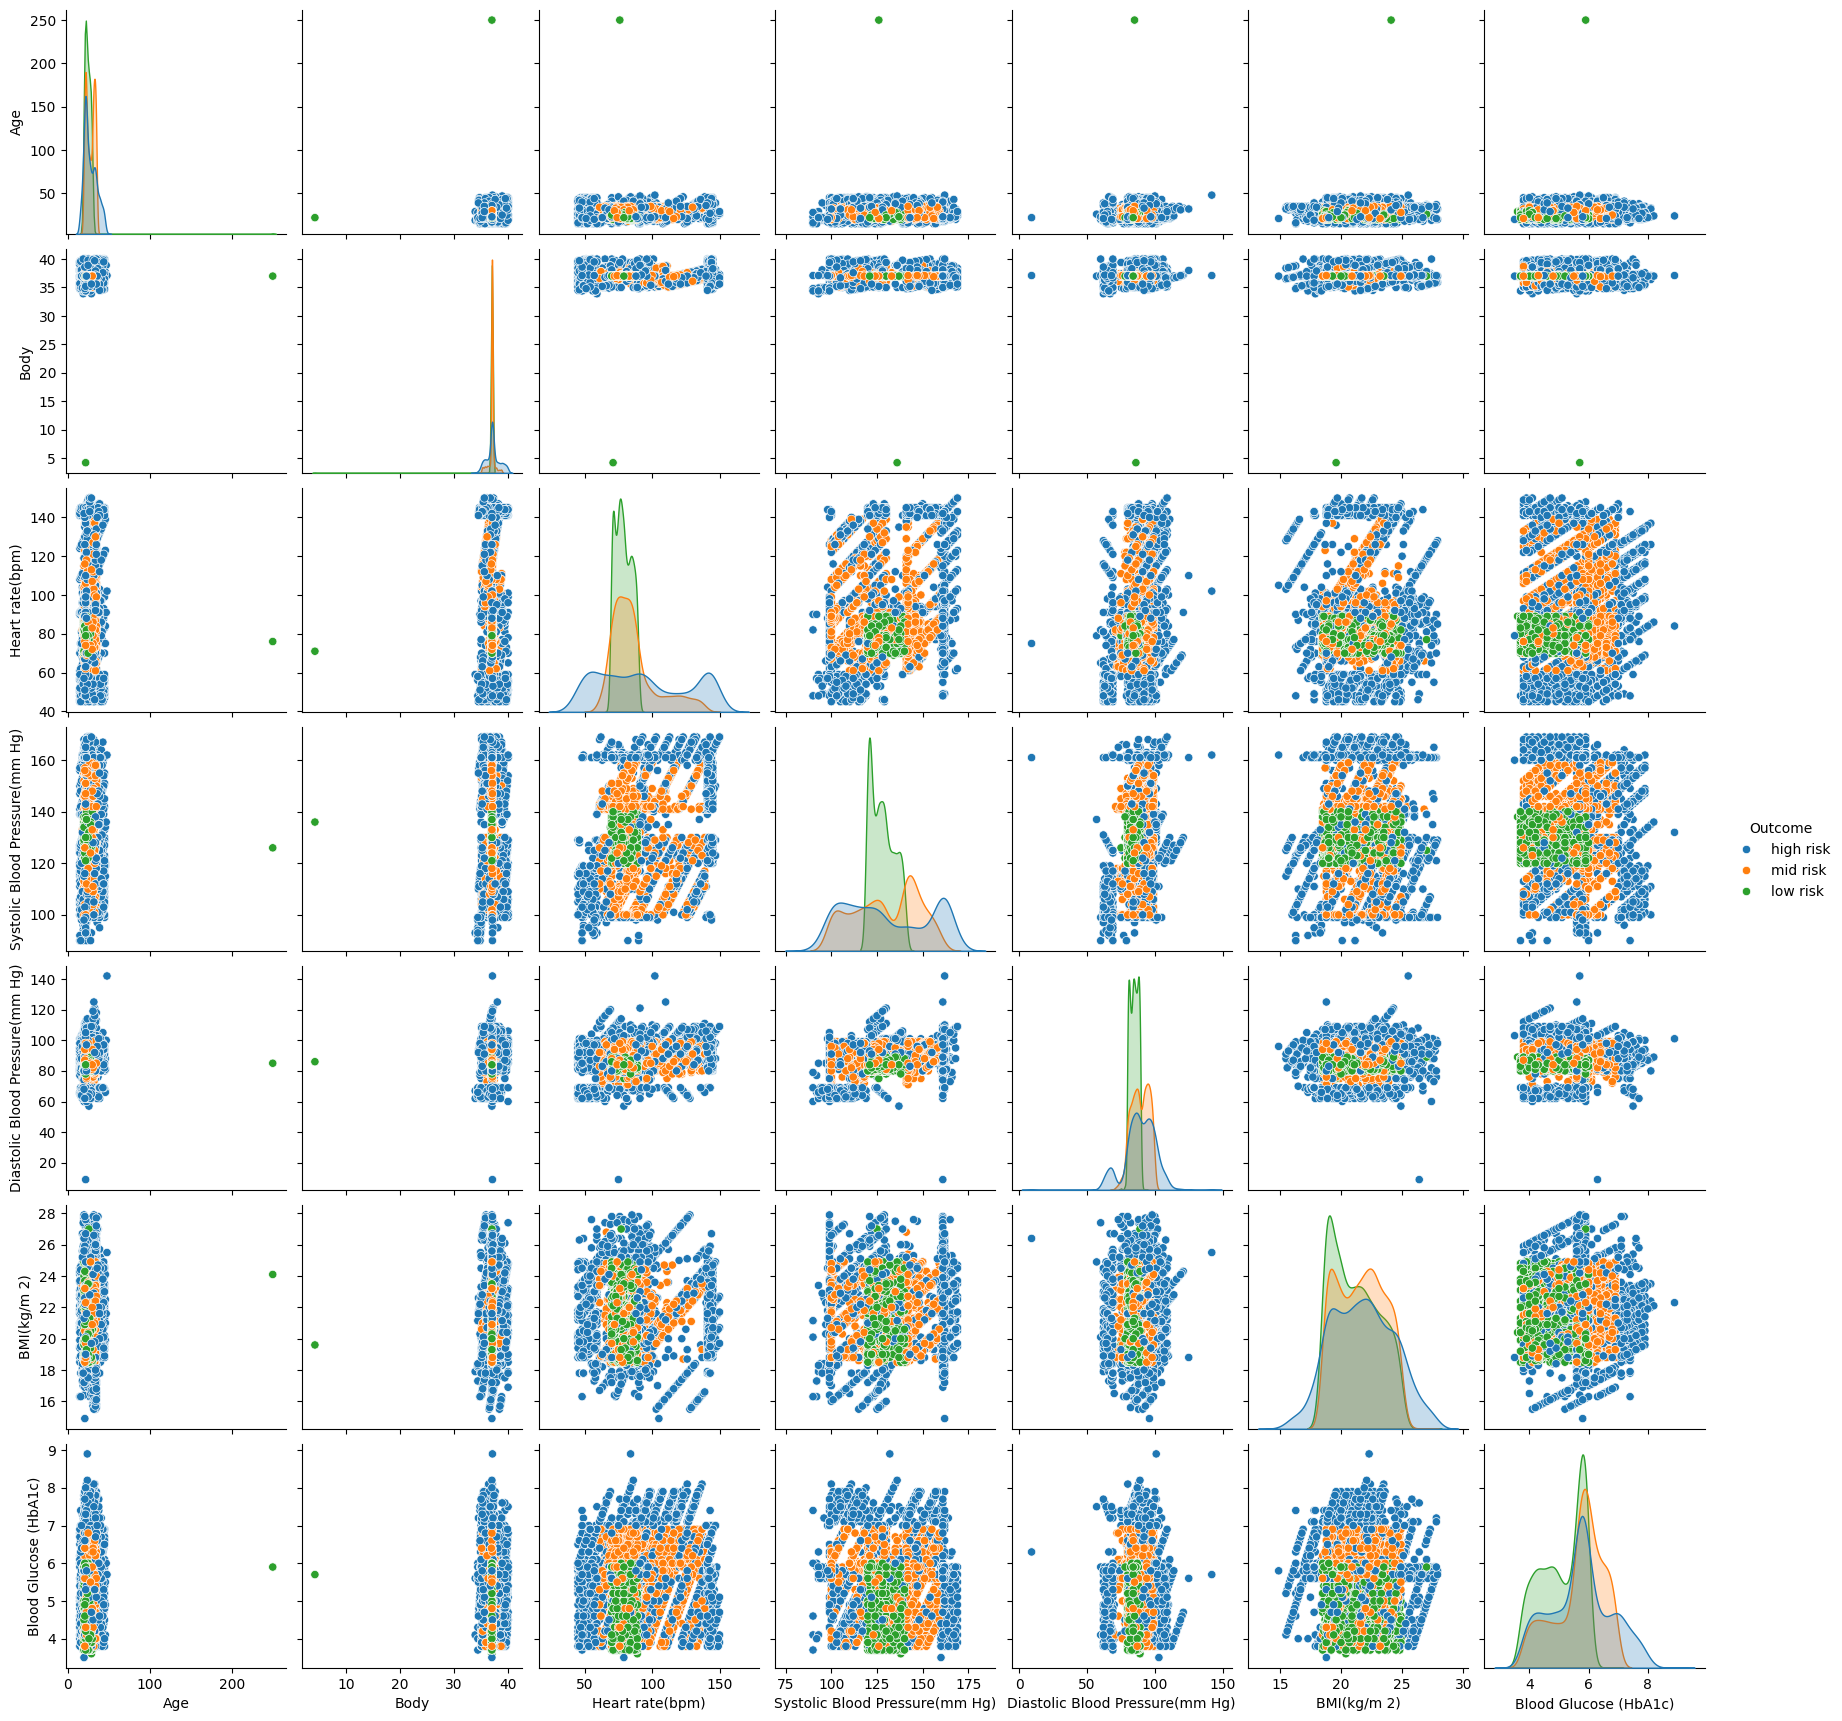

In [ ]:
# Visualisasi hubungan antara variabel numerik
sns.pairplot(df[['Age', 'Body', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)',
                 'Diastolic Blood Pressure(mm Hg)','BMI(kg/m 2)', 'Blood Glucose (HbA1c)', 'Outcome']],
                  hue='Outcome')

In [ ]:
features = ['Age', 'Body', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)',
            'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose (HbA1c)']
X = df[features]  # Fitur


In [ ]:
label_map = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
reverse_label_map = {v: k for k, v in label_map.items()}
y = df['Outcome'].map(label_map)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 kelas output
])

# Menyusun model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6187 - loss: 0.8251 - val_accuracy: 0.8339 - val_loss: 0.4281
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8370 - loss: 0.4454 - val_accuracy: 0.8489 - val_loss: 0.3670
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8836 - loss: 0.3660 - val_accuracy: 0.9033 - val_loss: 0.2862
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9005 - loss: 0.2957 - val_accuracy: 0.8796 - val_loss: 0.3013
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9102 - loss: 0.3039 - val_accuracy: 0.8884 - val_loss: 0.2999
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9136 - loss: 0.2605 - val_accuracy: 0.9086 - val_loss: 0.2575
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9265 - loss: 0.2286 - val_accuracy: 0.9060 - val_loss: 0.2582
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9270 - loss: 0.2121 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Menghitung Prediksi
y_pred = model.predict(X_test_scaled)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Mengambil kelas prediksi
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
# Pastikan y_test adalah 1D
y_test = np.array(y_test)

In [ ]:
# Menghitung MSE dan MAE
mse = mean_squared_error(y_test, y_pred_class)
mae = mean_absolute_error(y_test, y_pred_class)

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

Mean Squared Error (MSE): 0.06502636203866433
Mean Absolute Error (MAE): 0.0632688927943761

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       372
           1       0.92      0.90      0.91       387
           2       0.92      0.94      0.93       379

    accuracy                           0.94      1138
   macro avg       0.94      0.94      0.94      1138
weighted avg       0.94      0.94      0.94      1138



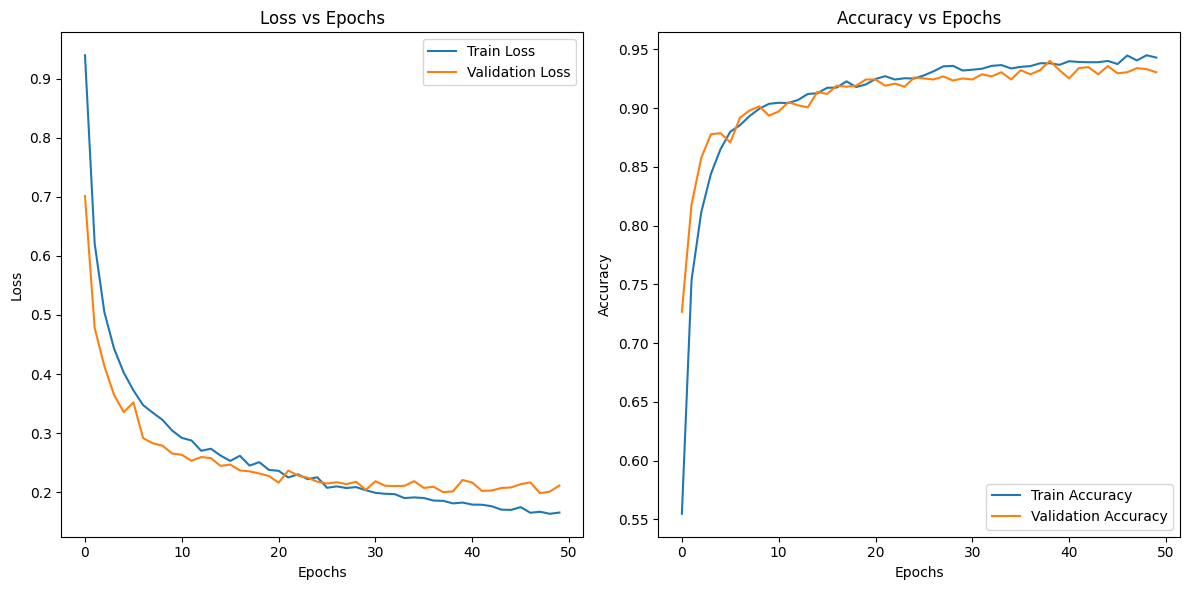

In [ ]:
import matplotlib.pyplot as plt
# Visualisasi Accuracy dan Loss
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Input data baru
new_data = [
    [21, 37, 82, 126, 82, 21.9, 4.9],  # low risk
    [31, 37, 82, 148, 99, 21.9, 5.9],  # mid risk
    [28, 37.4, 123, 101, 84, 22.9, 7.6],  # high risk
    [33, 37.9, 94, 127, 91, 18.8, 6.6],  # mid risk
    [30, 37, 72, 140, 81, 20.7, 4.4],  # low risk
    [28, 37, 83, 125, 87, 19.5, 5.6],  # low risk
    [24, 37, 71, 121, 82, 20.2, 4.8],  # low risk
    [33, 37, 75, 121, 96, 19.3, 6.1],  # mid risk
    [23, 37, 73, 149, 94, 19.1, 6.5]   # mid risk
]


In [ ]:
new_data = np.array(new_data)
new_data_scaled = scaler.transform(new_data)
new_data_pred = model.predict(new_data_scaled)

# Map predicted classes back to original labels
new_data_pred_classes = np.argmax(new_data_pred, axis=1)
predicted_labels = [reverse_label_map[label] for label in new_data_pred_classes]

# Print the predictions
for i, label in enumerate(predicted_labels):
    print(f"Prediction for data entry {i+1}: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for data entry 1: low risk
Prediction for data entry 2: mid risk
Prediction for data entry 3: high risk
Prediction for data entry 4: mid risk
Prediction for data entry 5: low risk
Prediction for data entry 6: low risk
Prediction for data entry 7: low risk
Prediction for data entry 8: mid risk
Prediction for data entry 9: mid risk


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('new_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as 'new_model.tflite'")

Saved artifact at '/tmp/tmpecnm3xv1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor_42')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139201248251920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139201248254384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139201248248400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139201248255968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139201248249280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139201248257552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139201248254560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139201248259488: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as 'new_model.tflite'
